# Data cleaning
Clean the data by fixing missing values and creating the adjacency matrix.


## Data exploration
Before creating the network, we need to explore the data to understand the structure of the dataset

In [9]:
import pandas as pd
import numpy as np

patients = pd.read_csv("../dataset/large_dataset.csv")
patients.rename(columns={"diseases": "Disease"}, inplace=True)
patients.info()

symptoms = patients.columns
symptoms = symptoms[1:]
symptoms_list = symptoms.unique()
pd.DataFrame(symptoms_list, columns=["symptom"]).to_csv("../dataset/symptoms.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, Disease to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


In [10]:
patients.describe()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
count,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,...,246945.0,246945.0,246945.0,246945.0,246945.000000,246945.0,246945.0,246945.0,246945.000000,246945.0
mean,0.039235,0.042746,0.086440,0.061001,0.097252,0.069943,0.039410,0.040572,0.037871,0.024876,...,0.0,0.0,0.0,0.0,0.001385,0.0,0.0,0.0,0.000073,0.0
std,0.194155,0.202285,0.281014,0.239333,0.296302,0.255051,0.194568,0.197296,0.190884,0.155747,...,0.0,0.0,0.0,0.0,0.037189,0.0,0.0,0.0,0.008537,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0


In [11]:
patients.sample(15).sort_values('Disease').reset_index(drop=True).style.background_gradient(cmap='Blues')

## Handling missing values

In [12]:
#patients.fillna(" ", inplace=True)
#patients = patients.map(lambda x: x.replace(" ", "") if isinstance(x, str) else x)

## One-hot encoding

In [13]:
patients_diseases = patients["Disease"].values.tolist()
diseases_list = patients["Disease"].unique()
pd.DataFrame(diseases_list, columns=["Disease"]).to_csv("../dataset/diseases.csv",index=False)

# Create a dictionary mapping each unique disease name to a unique numerical label
label_mapping = {disease: label for label, disease in enumerate(set(diseases_list))}

# Map the original disease names to numerical labels
diseases_labels = [label_mapping[disease] for disease in patients_diseases]

# Add the 'Disease' column to the new DataFrame
patients_with_labels = patients.copy()
patients_with_labels["Disease"] = diseases_labels

patients_with_labels.to_csv("../dataset/large_one_hot_encoding.csv", index=False)

# Class balance check

<Axes: title={'center': 'Disease distribution'}, xlabel='Disease', ylabel='Percent'>

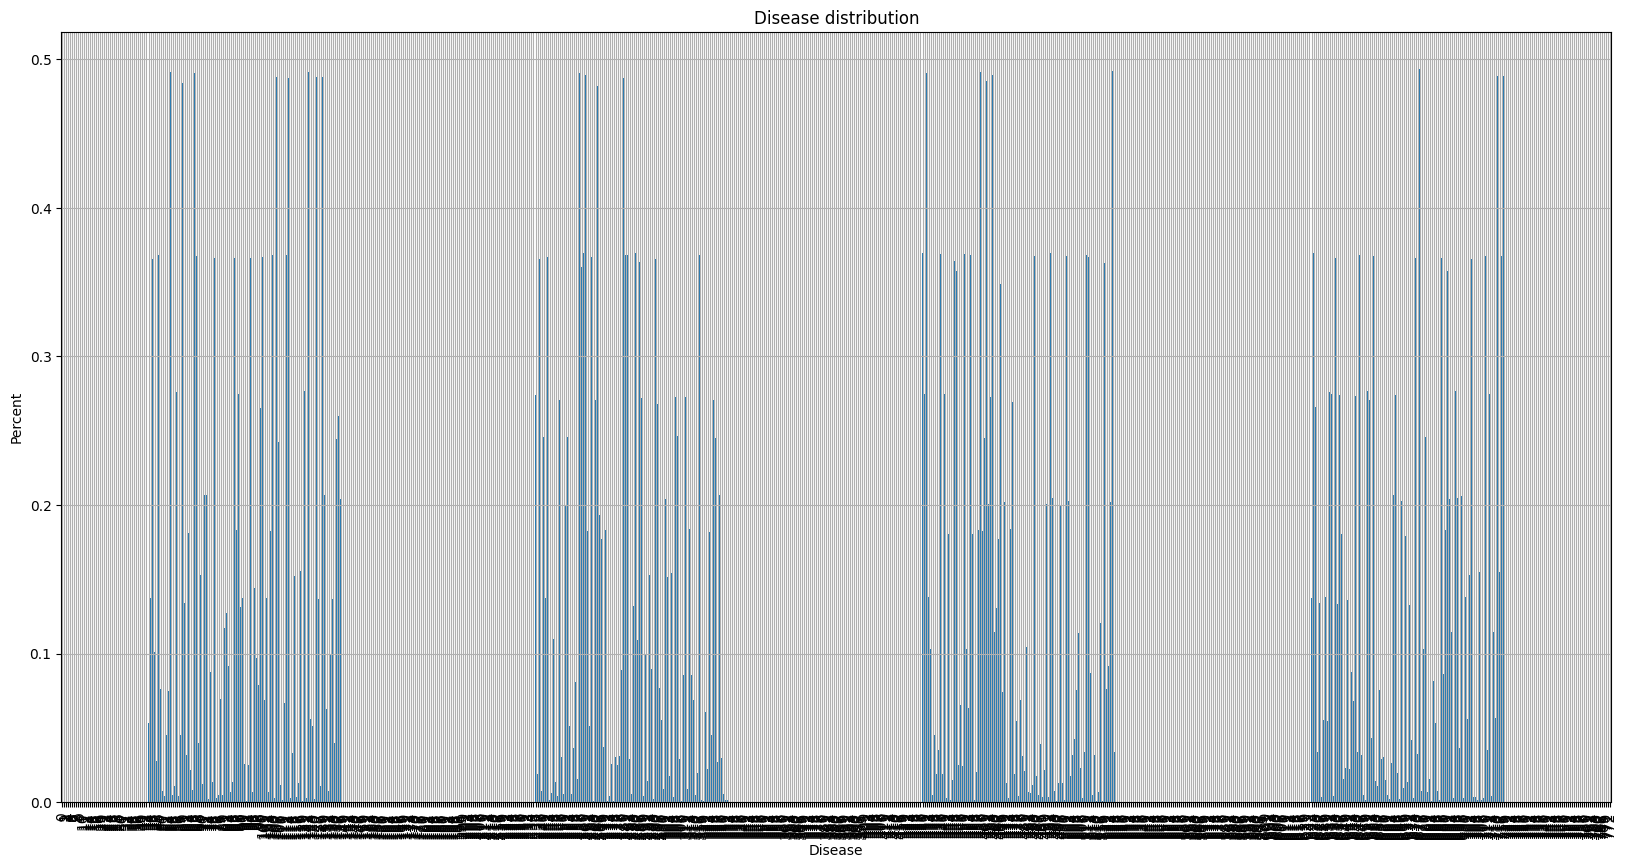

In [14]:
balance_count = patients_with_labels["Disease"].groupby(patients_with_labels["Disease"]).count()
balance_percent = balance_count / patients_with_labels["Disease"].count() * 100

balance_percent.plot(
    kind="bar",
    figsize=(20, 10),
    title="Disease distribution",
    grid=True,
    ylabel="Percent",
    xlabel="Disease",
)

In [15]:
# Store the one-hot-encoded DataFrame in a .npz file
tmp = np.array(patients_with_labels)
np.savez_compressed("../code/prediction_model/features/symptoms.npz", X = tmp[:,:-1], y = tmp[:,-1])

## Compute adjacency matrix

In [16]:
adjacency_matrix = patients.groupby("Disease").sum()

adjacency_matrix = adjacency_matrix.reset_index()
adjacency_matrix = adjacency_matrix.drop(["Disease"], axis=1)

adjacency_matrix = adjacency_matrix.apply(
    lambda x: x.map(lambda val: 1 if val != 0 else 0)
)
adjacency_matrix.insert(0, "Disease", patients["Disease"].unique())

adjacency_matrix.to_csv("../dataset/large_adjacency_matrix.csv", index=False)
adjacency_matrix.head()

,Disease,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vocal cord polyp,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,turner syndrome,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,cryptorchidism,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,poisoning due to ethylene glycol,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check if all symptoms are not lost 

In [17]:
columns = patients.columns[:-1].tolist()

difference = [item for item in symptoms if item not in patients.columns]
difference2 = [item for item in columns if item not in symptoms]

print(difference)
print(difference2)

print(len(columns))
print(len(symptoms))

[]
['Disease']
377
377
